<h1 align='center'>  Bangalore Air Quality Prediction </h1>
<h3 align='center'>  To predict the Air Quality of Bangalore City from 2013-2018 </h3>

## 0. Import relevant Dependencies

Incase you are getting any error saying the package is not installed while running the below cell, then you can use two methods:
- pip install ________.
- google 'How to install ________'.

In [1]:
# Import Dependencies -To see the graphs in the notebook.
%matplotlib inline   

# Python Imports
import math,time,random,datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use('fivethirtyeight')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Display all the columns/rows of the DataFrame.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 1. Loading the required Data

In [2]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')
df.head()

,T,TM,Tm,H,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,59.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,6.9,3.3,5.4,223.208333


In [3]:
print('Dimensionality of the obtained Data is: ', df.shape)

Dimensionality of the obtained Data is:  (737, 8)


## 2. Feature Engineering

In [4]:
# Understanding more about the missing value columns

def missing_values_table(df):
    # number of missing values
    mis_val = df.isnull().sum()

    # % of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # make table # axis '0' concat along index, '1' column
    mis_val_table = pd.concat([mis_val,mis_val_percent], axis= 1) 

    # rename columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0: 'Missing Values', 1: '% of Total Values'})

    # sort by column
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!= 0].sort_values(
        '% of Total Values', ascending= False).round(1) #Review
    print("Your selected dataset has " + str(df.shape[1]) + " columns and " + str(len(df)) + " observations.\n"
         "\n There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    
    # return the dataframe with missing info
    return mis_val_table_ren_columns

missing_values_table(df)

Your selected dataset has 8 columns and 737 observations.

 There are 1 columns that have missing values.


,Missing Values,% of Total Values
PM 2.5,1,0.1


In [5]:
## Dropping the Null Values
df = df.dropna()

In [6]:
## Splitting our Data to Dependent and Independent Features
X = df.iloc[:,:-1] ### Independent Features
y = df.iloc[:,-1] ### Dependent Features

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

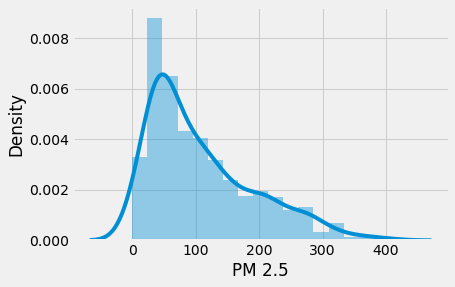

In [8]:
## Understanding the Distribution
sns.distplot(y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

## 3 Decision Tree Regressor Model

In [10]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(criterion= 'mse')     ##Initializing Decision Tree by just the criterion.

In [11]:
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [12]:
print(f'Coefficient of Determination R2 <-- on train set is: {dtree.score(X_train, y_train)}')
print()
print(f'Coefficient of Determination R2 <-- on test set is: {dtree.score(X_test, y_test)}')

Coefficient of Determination R2 <-- on train set is: 1.0

Coefficient of Determination R2 <-- on test set is: -0.3475981711554288


- This is purely a situation of ***Overfitting***

In [44]:
## Trying with CrossValidation.
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtree, X, y, cv = 5)        ## Because Cross inturn divides the datasets into train and test
score.mean()

-0.29219107552475937

### Model Evaluation

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

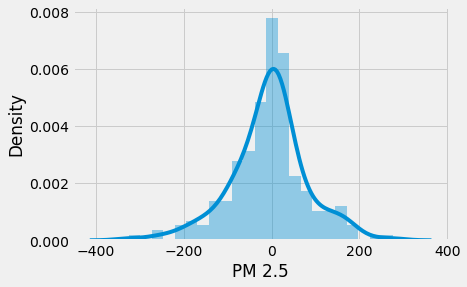

In [34]:
## Predict
prediction = dtree.predict(X_test)
sns.distplot(y_test-prediction)

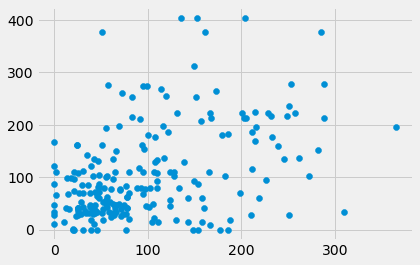

In [35]:
plt.scatter(y_test, prediction)

### 3.1 HyperParameter Tuning - Decision Tree Regressor

In [38]:
## Hyper Parameter Optimization

## Key Dictionary
params = {
    "splitter": ['best', 'random'],
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "min_weight_fraction_leaf": [0.1, 0.2, 0.3, 0.4, 0.5],
    "max_features": ['auto', 'sqrt', 'log2', None],
    "max_leaf_nodes": [None, 10, 20, 30, 40, 50, 60, 70]
}

In [39]:
## Hyper-Parameter Optimization Using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [40]:
grid_search = GridSearchCV(dtree, param_grid= params, scoring= 'neg_mean_squared_error', n_jobs= -1, cv= 10, verbose= 3)

In [41]:
grid_search.fit(X, y)

Fitting 10 folds for each of 12800 candidates, totalling 128000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 2296 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3960 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 5792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 7968 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 10400 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 13088 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 16032 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 19232 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 22688 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 26400 tasks  

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [42]:
grid_search.best_params_

{'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': 40,
 'min_samples_leaf': 3,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [43]:
grid_search.best_score_

-4205.553571915564

### Model Evaluation - HyperParameter Tuning

> #### This will never lead to overfitting as we had done Hyperparameter Tuning. This will give us a generalized model.

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

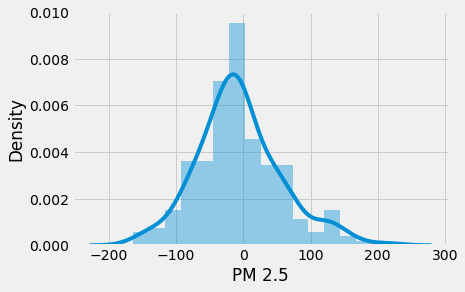

In [45]:
## Predict
prediction = grid_search.predict(X_test)
sns.distplot(y_test-prediction)

## Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error (MSE)** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

### Comparing these metrics:

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.



In [47]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test, prediction))
print('MSE: ', metrics.mean_squared_error(y_test, prediction))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE:  48.2723599757697
MSE:  4013.838402899022
RMSE:  63.35486092557557


In [48]:
import pickle

## Open a file, where we want to store the data.
file = open('decision_tree_model.pkl', 'wb')

## Dump all the information to this file.
pickle.dump(grid_search, file)